<a href="https://colab.research.google.com/github/ngochif/fngochi_64061/blob/main/Car_Reviews_Project_(Text_Analytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading required libraries and dataset

In [ ]:
!pip install gensim matplotlib pandas
import pandas as pd
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving car_reviews_large.csv to car_reviews_large.csv


In [3]:
data=pd.read_csv('car_reviews_large.csv')

**2. Exploratory Data Analysis**

*Data Preparation*

In [ ]:
print(data.head())

   reviewid   make model  year                         title       author  \
0         1  ACURA   ILX  2017                     A new Dud  Laurel Blue   
1         2  ACURA   ILX  2015               Noisy as heck !       Seth L   
2         3  ACURA   ILX  2015  Great entry level luxury car      NicBran   
3         4  ACURA   ILX  2015                  Amazing Car!     robin707   
4         5  ACURA   ILX  2015         My ILX is a great car   stevenrose   

   perform_rating  comfort_rating  fuel_econ_rating  fun_rating  ...  \
0               0               0                 0           0  ...   
1               0               0                 0           0  ...   
2               0               0                 0           0  ...   
3               5               5                 4           5  ...   
4               5               5                 5           5  ...   

   exterior_rating  build_qual_rating  reliab_rating  \
0                0                  0           

In [4]:
# Display the initial number of rows for comparison
print("Initial number of rows:", data.shape[0])

#Drop rows with any null values
data.dropna(inplace=True)

# Display the number of rows after dropping null values
print("Number of rows after dropping nulls:", data.shape[0])

Initial number of rows: 110121
Number of rows after dropping nulls: 80476


*Analysing numerical variables*

In [ ]:
print(data.describe())# Summarize the statistical details for numerical variables

            reviewid           year  perform_rating  comfort_rating  \
count  110121.000000  110121.000000   110121.000000   110121.000000   
mean    55061.000000    2009.810999        3.695117        3.745725   
std     31789.338834       2.794950        1.849023        1.835550   
min         1.000000    2007.000000        0.000000        0.000000   
25%     27531.000000    2008.000000        3.000000        3.000000   
50%     55061.000000    2009.000000        5.000000        5.000000   
75%     82591.000000    2011.000000        5.000000        5.000000   
max    110121.000000    2017.000000        5.000000        5.000000   

       fuel_econ_rating     fun_rating  interior_rating  exterior_rating  \
count     110121.000000  110121.000000    110121.000000    110121.000000   
mean           3.438708       3.734637         3.721879         3.872976   
std            1.801905       1.869711         1.835980         1.835164   
min            0.000000       0.000000         0.000000 

Feature Engineering: Creating new features for text and performance

In [5]:
# Combine textual data into one column for simplicity
data['all_text'] = data['title'].str.cat(data[['title', 'text', 'fav_feat', 'sugg_imp']], sep=' ')

# Create 'total_engagement' by summing up the specified columns
data['total_engagement'] = data['cnt_thumbs_up'] + data['cnt_thumbs_down'] + data['comment_cnt']


#View dataset
print(data.head())

   reviewid   make model  year  \
3         4  ACURA   ILX  2015   
4         5  ACURA   ILX  2015   
6         7  ACURA   ILX  2014   
7         8  ACURA   ILX  2014   
9        10  ACURA   ILX  2014   

                                               title      author  \
3                                       Amazing Car!    robin707   
4                              My ILX is a great car  stevenrose   
6                                            Love it     wdc6446   
7  What you expect from the driver's seat isn't w...     zoomjag   
9         Great Alternative to Boring Commuter Cars!   david_d82   

   perform_rating  comfort_rating  fuel_econ_rating  fun_rating  ...  \
3               5               5                 4           5  ...   
4               5               5                 5           5  ...   
6               5               5                 5           5  ...   
7               2               3                 3           3  ...   
9               4         

**I. Exploratory Data Analysis of the Text Features**

In [14]:
print(data.describe())

            reviewid          year  perform_rating  comfort_rating  \
count   80476.000000  80476.000000    80476.000000    80476.000000   
mean    55673.121987   2008.936229        4.457229        4.500112   
std     31875.675889      1.937722        0.908062        0.855100   
min         4.000000   2007.000000        0.000000        0.000000   
25%     28293.750000   2007.000000        4.000000        4.000000   
50%     56050.500000   2008.000000        5.000000        5.000000   
75%     83319.250000   2010.000000        5.000000        5.000000   
max    110121.000000   2016.000000        5.000000        5.000000   

       fuel_econ_rating    fun_rating  interior_rating  exterior_rating  \
count      80476.000000  80476.000000     80476.000000     80476.000000   
mean           4.136090      4.503044         4.473284         4.650678   
std            1.035376      0.928726         0.879461         0.715791   
min            0.000000      0.000000         0.000000         0.0000

In [ ]:
# Look at the distribution of text lengths of reviews
data['all_text'] = data['all_text'].apply(len)
print(data['all_text'].describe())

count    80476.000000
mean         3.299182
std          0.458174
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: all_text, dtype: float64


*Word Cloud and Top Words*

In [ ]:
# Download and update stopwords from nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Generate a word cloud for the combined text column
data['all_text'] = data['all_text'].astype(str)
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stop_words,
                      min_font_size = 10).generate(' '.join(data['all_text']))

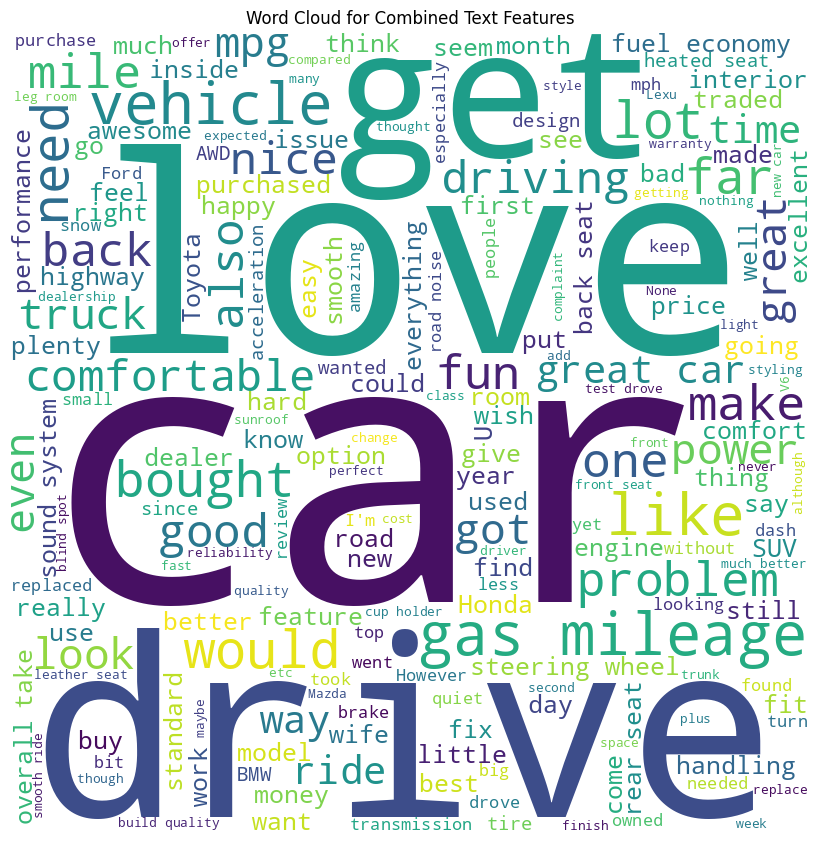

In [ ]:
# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Combined Text Features')
plt.show()

In [ ]:
# Explore top 10 frequent words in the reviews
vec = CountVectorizer(stop_words=stop_words)
text_matrix = vec.fit_transform(data['all_text'])
sum_words = text_matrix.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
top_words_df = pd.DataFrame(words_freq[:10], columns=['Word', 'Frequency'])
print(top_words_df)

       Word  Frequency
0       car     161889
1     great      77126
2      like      50855
3      love      47425
4     drive      44169
5      good      42475
6     seats      41949
7  interior      40150
8    better      39555
9       gas      36575


<ipython-input-83-313cbbe44258>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=top_words_df, palette='viridis')


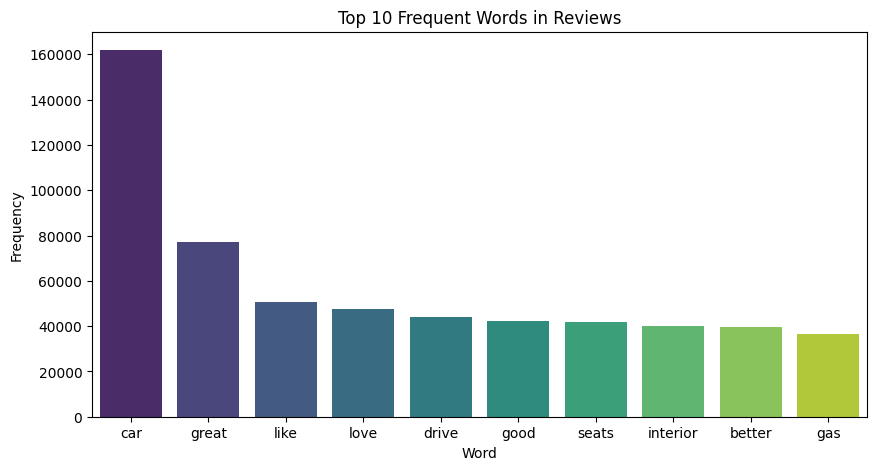

In [ ]:
# Plotting bar chart for the top words
plt.figure(figsize=(10, 5))
sns.barplot(x='Word', y='Frequency', data=top_words_df, palette='viridis')
plt.title('Top 10 Frequent Words in Reviews')
plt.show()

*Sentiment Analysis*

In [ ]:
from textblob import TextBlob
# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply function to get sentiment
data['sentiment'] = data['all_text'].apply(get_sentiment)

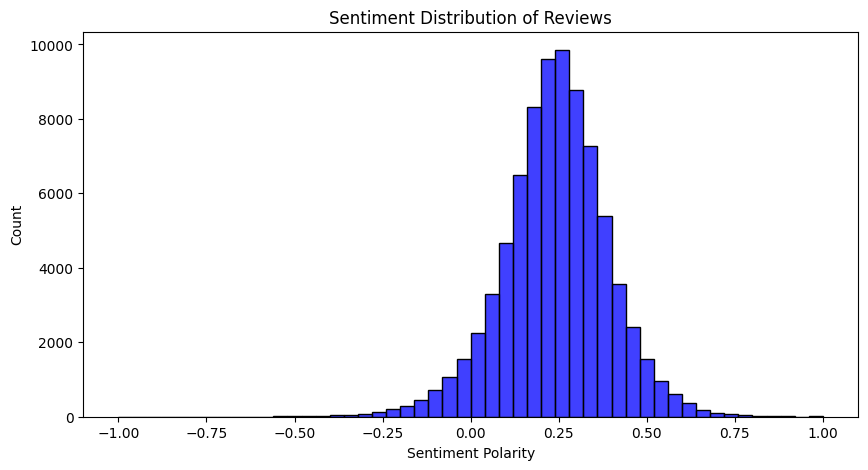

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['sentiment'], bins=50, kde=False, color='blue')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

*Extracting Key Topics from the Corpus using LDA*

In [ ]:
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
# Preprocessing text for topic modeling
tokenizer = RegexpTokenizer(r'\w+')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize and remove stop words
data['tokens'] = data['all_text'].apply(lambda x: [token.lower() for token in tokenizer.tokenize(x) if token.lower() not in stop_words])

# Create a dictionary and corpus needed for Topic Modeling
dictionary = corpora.Dictionary(data['tokens'])
corpus = [dictionary.doc2bow(text) for text in data['tokens']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=15)


In [ ]:
# Print the topics
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.016*"seats" + 0.014*"rear" + 0.013*"seat" + 0.011*"back" + 0.010*"great" + 0.009*"truck" + 0.008*"like" + 0.008*"love" + 0.007*"vehicle" + 0.007*"power"')
(1, '0.024*"car" + 0.022*"mpg" + 0.018*"mileage" + 0.017*"gas" + 0.015*"great" + 0.013*"good" + 0.011*"miles" + 0.010*"highway" + 0.010*"driving" + 0.009*"better"')
(2, '0.029*"car" + 0.014*"great" + 0.012*"interior" + 0.010*"love" + 0.008*"volvo" + 0.008*"ride" + 0.008*"better" + 0.007*"like" + 0.007*"quality" + 0.007*"drive"')
(3, '0.025*"car" + 0.012*"miles" + 0.009*"dealer" + 0.008*"problem" + 0.007*"problems" + 0.007*"new" + 0.006*"one" + 0.006*"back" + 0.006*"quality" + 0.006*"000"')
(4, '0.035*"car" + 0.010*"drive" + 0.010*"like" + 0.009*"fun" + 0.008*"system" + 0.006*"get" + 0.006*"driving" + 0.006*"engine" + 0.006*"speed" + 0.006*"turbo"')


Feature Engineering

**II. Predictive Engagement (Comment Count) Using Text and Numeric Features**

Predict Using Numeric Data Only

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

# Assuming 'data' is your DataFrame and contains the numeric ratings and target column 'comment_cnt'
numeric_features = data[['perform_rating', 'fuel_econ_rating', 'fun_rating', 'interior_rating',
                          'exterior_rating', 'build_qual_rating', 'reliab_rating', 'comfort_rating']]
target = data['comment_cnt']

# Numeric feature scaling
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_features)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(numeric_scaled, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Build a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

# Evaluate the model
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred.flatten())  # Flatten to match y_test dimensions
print(f'Test MSE: {test_mse}')

Epoch 1/5
1761/1761 [==============================] - 7s 3ms/step - loss: 0.5177 - val_loss: 0.4855
Epoch 2/5
1761/1761 [==============================] - 7s 4ms/step - loss: 0.5124 - val_loss: 0.4851
Epoch 3/5
1761/1761 [==============================] - 5s 3ms/step - loss: 0.5110 - val_loss: 0.4854
Epoch 4/5
1761/1761 [==============================] - 8s 4ms/step - loss: 0.5108 - val_loss: 0.4854
Epoch 5/5
252/252 [==============================] - 0s 2ms/step
Test MSE: 0.20172280579335164


Using Text Data Only

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Assuming 'data' dataframe with 'all_text' and 'comment_cnt' columns
text_features = data['all_text']
target = data['comment_cnt']

# Text processing: Tokenizing text
tokenizer = Tokenizer(num_words=1000)  # Limits the maximum number of words to keep
tokenizer.fit_on_texts(text_features)
sequences = tokenizer.texts_to_sequences(text_features)
text_data = pad_sequences(sequences, maxlen=100)  # Pads or truncates the texts to a length of 100

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(text_data, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Build a neural network model using LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=64, input_length=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

# Evaluate the model
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred.flatten())  # Flatten to match y_test dimensions
print(f'Test MSE: {test_mse}')

Epoch 1/5
1761/1761 [==============================] - 180s 101ms/step - loss: 0.5088 - val_loss: 0.4715
Epoch 2/5
1761/1761 [==============================] - 142s 80ms/step - loss: 0.4948 - val_loss: 0.4392
Epoch 3/5
1761/1761 [==============================] - 154s 88ms/step - loss: 0.4510 - val_loss: 0.3608
Epoch 4/5
1761/1761 [==============================] - 141s 80ms/step - loss: 0.3877 - val_loss: 0.3169
Epoch 5/5
252/252 [==============================] - 5s 18ms/step
Test MSE: 0.20383748002167248


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# Assuming 'data' dataframe with 'all_text' and 'comment_cnt' columns
text_features = data['all_text']
target = data['comment_cnt']

# Text processing: Tokenizing text
tokenizer = Tokenizer(num_words=1000)  # Limits the maximum number of words to keep
tokenizer.fit_on_texts(text_features)
sequences = tokenizer.texts_to_sequences(text_features)
text_data = pad_sequences(sequences, maxlen=100)  # Pads or truncates the texts to a length of 100

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(text_data, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Build a neural network model using only Dense layers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=64, input_length=100),
    tf.keras.layers.Flatten(),  # Flatten the output of the embedding
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

# Evaluate the model
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred.flatten())  # Flatten to match y_test dimensions
print(f'Test MSE: {test_mse}')

Epoch 1/5
1761/1761 [==============================] - 67s 37ms/step - loss: 0.4901 - val_loss: 0.4306
Epoch 2/5
1761/1761 [==============================] - 67s 38ms/step - loss: 0.3431 - val_loss: 0.3350
Epoch 3/5
1761/1761 [==============================] - 66s 37ms/step - loss: 0.1722 - val_loss: 0.3826
Epoch 4/5
1761/1761 [==============================] - 68s 39ms/step - loss: 0.2028 - val_loss: 0.3022
Epoch 5/5
252/252 [==============================] - 2s 7ms/step
Test MSE: 0.19269779342651247


Combining Text and Numeric

Using maxlen = 172 based on the 95th percentile of text lengths.


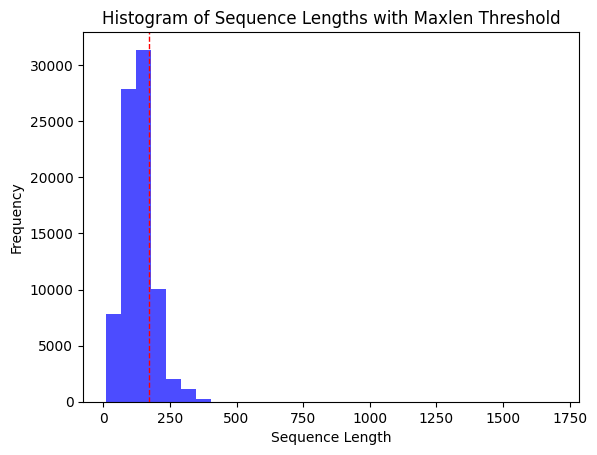

Epoch 1/5
1761/1761 [==============================] - 116s 65ms/step - loss: 0.4419 - val_loss: 3.2635
Epoch 2/5
1761/1761 [==============================] - 113s 64ms/step - loss: 1.0085 - val_loss: 0.3590
Epoch 3/5
1761/1761 [==============================] - 109s 62ms/step - loss: 0.1534 - val_loss: 0.2957
Epoch 4/5
1761/1761 [==============================] - 121s 69ms/step - loss: 0.0869 - val_loss: 0.2763
Epoch 5/5
252/252 [==============================] - 2s 9ms/step
Test MSE: 0.19348041674618877


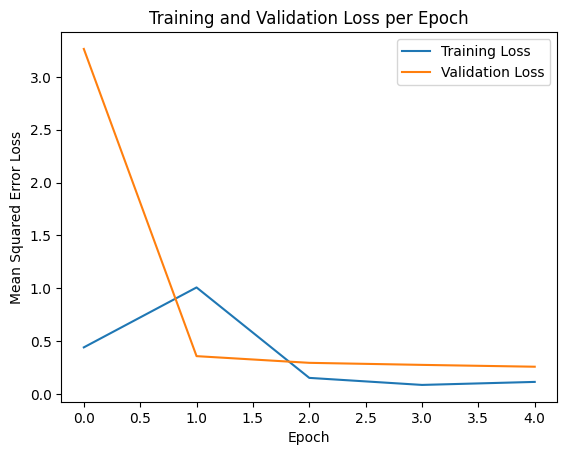

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'data' dataframe with 'all_text' and 'comment_cnt' columns
text_features = data['all_text']
target = data['comment_cnt']

# Text processing: Tokenizing text
tokenizer = Tokenizer(num_words=1000)  # Limits the maximum number of words to keep
tokenizer.fit_on_texts(text_features)
sequences = tokenizer.texts_to_sequences(text_features)

# Calculate the 95th percentile of text lengths to set maxlen
lengths = [len(x) for x in sequences]
maxlen = int(np.percentile(lengths, 80))
print(f"Using maxlen = {maxlen} based on the 95th percentile of text lengths.")

# Pad sequences to the calculated maxlen
text_data = pad_sequences(sequences, maxlen=maxlen)

# Plotting the histogram of sequence lengths
plt.hist(lengths, bins=30, color='blue', alpha=0.7)
plt.axvline(maxlen, color='r', linestyle='dashed', linewidth=1)
plt.title('Histogram of Sequence Lengths with Maxlen Threshold')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(text_data, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Build a neural network model using only Dense layers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=64, input_length=maxlen),
    tf.keras.layers.Flatten(),  # Flatten the output of the embedding
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

# Evaluate the model
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred.flatten())  # Flatten to match y_test dimensions
print(f'Test MSE: {test_mse}')

# Plotting training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()